In [244]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [245]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [246]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [247]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [248]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [249]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

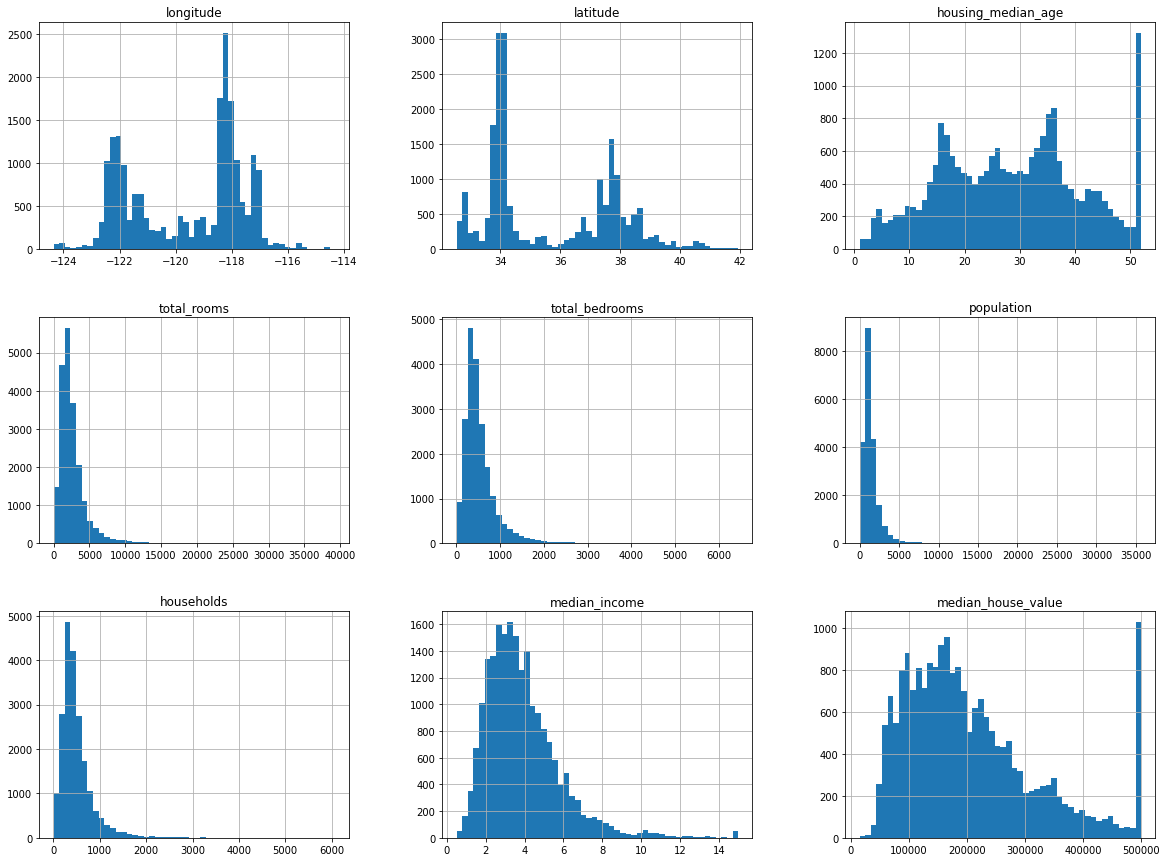

In [250]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [251]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [252]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [253]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [254]:
housing = strat_train_set.copy()

In [255]:
corr_matrix = housing.corr()

In [256]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

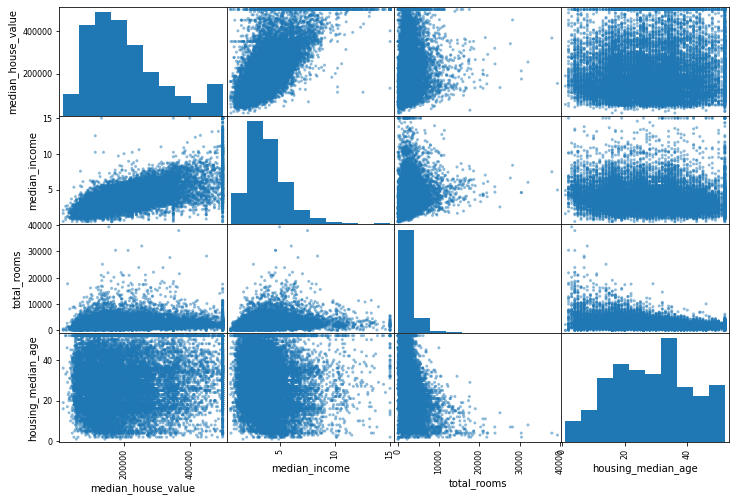

In [257]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [258]:
# 属性を合体させて意味のある属性を作る
# 世帯あたりの部屋数
housing["room_per_households"] = housing["total_rooms"]/housing["households"]
# 部屋あたりの寝室数
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# 世帯あたりの人数
housing["population_per_households"] = housing["population"]/housing["households"]

In [259]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
room_per_households          0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
population_per_households   -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

In [260]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [261]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [262]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [263]:
X = imputer.transform(housing_num)

In [264]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [265]:
housing_cat = housing[["ocean_proximity"]]

In [266]:
from sklearn.base import BaseEstimator,TransformerMixin
class_maping = {"ISLAND":1,"NEAR OCEAN":0,"<1H OCEAN":0,"NEAR BAY":0,"INLAND":0}

class OceanProximityChanger(BaseEstimator,TransformerMixin):
    def __init__(self,do=True):
        self.do = do

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X = X["ocean_proximity"].map(class_maping)
        return pd.DataFrame(X)
    

In [267]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)


In [268]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [269]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,populations_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        populations_per_household = X[:,populations_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,populations_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,populations_per_household]

In [270]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [271]:
drop_columns_ix = [6,5,4,7]
class NotImportantAttrRemove(BaseEstimator,TransformerMixin):
    def __init__(self):
        self = self
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return np.delete(X,drop_columns_ix,axis=1)
        

In [272]:
test = OceanProximityChanger()
a=test.transform(housing)
pd.DataFrame(a)

,ocean_proximity
12655,0
15502,0
2908,0
14053,0
20496,0
...,...
15174,0
12661,0
19263,0
19140,0


In [273]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [274]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attr_adder',CombinedAttributesAdder()),
    ('attr_remove',NotImportantAttrRemove()),
    ('std_scalar',StandardScaler())
])

housing_num_tr = num_pipline.fit_transform(housing_num)

In [275]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [276]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipelines = ColumnTransformer([
    ('num',num_pipline,num_attribs),
    ('cat',OceanProximityChanger(),cat_attribs)
])

housing_prepared = full_pipelines.fit_transform(housing)

In [277]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [278]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std",scores.std())

In [279]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [51471.09768607 48460.55382292 45844.86735009 50683.67783302
 46871.84427576 49171.0787625  52260.97514331 46895.82937201
 48783.86316062 52829.0865138 ]
Mean: 49327.28739201055
Std 2290.070194915711


In [280]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
    ]

grid = GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [281]:
grid.best_params_

{'max_features': 6, 'n_estimators': 30}

In [282]:
cvres = grid.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

65500.99850281948 {'max_features': 2, 'n_estimators': 3}
56427.5329837586 {'max_features': 2, 'n_estimators': 10}
54622.473197899264 {'max_features': 2, 'n_estimators': 30}
61041.408238584314 {'max_features': 4, 'n_estimators': 3}
54242.29162446407 {'max_features': 4, 'n_estimators': 10}
51641.726956997365 {'max_features': 4, 'n_estimators': 30}
59803.1109484837 {'max_features': 6, 'n_estimators': 3}
53006.484304562764 {'max_features': 6, 'n_estimators': 10}
50452.47265668898 {'max_features': 6, 'n_estimators': 30}
59919.224621653695 {'max_features': 8, 'n_estimators': 3}
52604.3847257217 {'max_features': 8, 'n_estimators': 10}
50955.07148592436 {'max_features': 8, 'n_estimators': 30}
63982.69095237675 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55482.29671524582 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60214.67664767812 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53383.470475511494 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [283]:
features_importances = grid.best_estimator_.feature_importances_
features_importances

array([2.12683813e-01, 2.21053382e-01, 6.01799168e-02, 3.49065437e-02,
       9.39056571e-02, 1.48831000e-01, 2.28424823e-01, 1.48649492e-05])